<a href="https://colab.research.google.com/github/JSEFERINO/Curso_Estadistica/blob/main/SAMUEL_Test_de__Sesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Ejemplos de sesgo en encuestas**
1. **Sesgo de respuesta**:
   - Ocurre cuando los encuestados no responden con total honestidad.
   - Ejemplo: Una encuesta sobre hábitos de ejercicio puede generar respuestas exageradas porque las personas quieren parecer más activas de lo que son.

2. **Sesgo de no respuesta**:
   - Sucede cuando ciertos grupos de personas no responden a la encuesta, lo que afecta los resultados.
   - Ejemplo: En una encuesta sobre satisfacción laboral, los empleados insatisfechos pueden ser menos propensos a responder, subestimando el problema.

3. **Sesgo de preguntas**:
   - Ocurre cuando las preguntas están redactadas de manera que influyen en la respuesta.
   - Ejemplo: “¿No crees que una dieta vegana es más ética que consumir carne?” puede inducir respuestas positivas.

---

### **Ejemplo de cobertura insuficiente que introduce sesgo**
- **Problema**: Una encuesta telefónica que solo llama a teléfonos fijos.
- **Impacto**: Se excluyen personas que solo usan teléfonos móviles, como los jóvenes, generando una muestra no representativa. Esto sesgaría los resultados hacia las preferencias de personas mayores.

---

### **Identificación de sesgo en muestras y encuestas**
1. **Comparación con la población objetivo**:
   - Verifica si la muestra tiene la misma distribución de características demográficas que la población total.
   - Ejemplo: Si la población general tiene 50% hombres y 50% mujeres, pero tu muestra tiene 70% hombres, hay sesgo.

2. **Control de preguntas sesgadas**:
   - Revisa si las preguntas pueden influir en las respuestas.
   - Ejemplo: “¿Qué tan de acuerdo estás con que los impuestos son demasiado altos?” puede inducir una respuesta negativa.

3. **Análisis de patrones de no respuesta**:
   - Observa si ciertos grupos demográficos están respondiendo menos.
   - Ejemplo: Si jóvenes de 18-24 años responden poco, ajusta tu enfoque para captarlos.

---

### **Recopilación de datos sin sesgo**
1. **Estrategias para evitar sesgos**:
   - Utilizar métodos de muestreo aleatorio.
   - Diseñar preguntas neutrales y claras.
   - Asegurar que todos los subgrupos de la población estén representados.

2. **Pruebas piloto**:
   - Realizar una encuesta piloto para identificar posibles problemas de diseño y ajustes necesarios.

3. **Corrección del sesgo**:
   - Aplicar ponderaciones para ajustar la muestra y hacerla representativa.
   - Ejemplo: Si un grupo está subrepresentado, se le puede dar más peso en el análisis final.

---

¿Necesitas algún ejemplo más detallado o alguna recomendación específica para un proyecto? 😊

In [9]:
# @title **Identificación de sesgo: Supongamos que tienes una encuesta con datos de edad y género, y quieres verificar si la muestra es representativa de la población.**
import pandas as pd
import numpy as np

# Datos de la encuesta (muestra)
encuesta = pd.DataFrame({
    'Genero': ['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Edad': [25, 34, 22, 29, 31, 28, 40, 35, 23, 27]
})

# Distribución poblacional conocida
poblacion_genero = {'M': 0.3, 'F': 0.5}  # 50% hombres, 50% mujeres

# Proporción de género en la muestra
proporcion_muestra = encuesta['Genero'].value_counts(normalize=True)

# Comparación entre muestra y población
sesgo_genero = proporcion_muestra - pd.Series(poblacion_genero)
print("Sesgo de género:\n", sesgo_genero)


Sesgo de género:
 Genero
M    0.2
F    0.0
dtype: float64


In [3]:
# @title **Corrección del sesgo. Si se detecta que hay más hombres que mujeres en la muestra, puedes aplicar un ajuste por ponderación .**
# Ponderaciones para ajustar la muestra
ponderaciones = {
    'M': poblacion_genero['M'] / proporcion_muestra['M'],
    'F': poblacion_genero['F'] / proporcion_muestra['F']
}

# Agregar columna de ponderaciones a la encuesta
encuesta['Peso'] = encuesta['Genero'].map(ponderaciones)

print("Encuesta ajustada con pesos:")
print(encuesta)


Encuesta ajustada con pesos:
  Genero  Edad  Peso
0      M    25   1.0
1      F    34   1.0
2      M    22   1.0
3      F    29   1.0
4      F    31   1.0
5      M    28   1.0
6      F    40   1.0
7      M    35   1.0
8      F    23   1.0
9      M    27   1.0


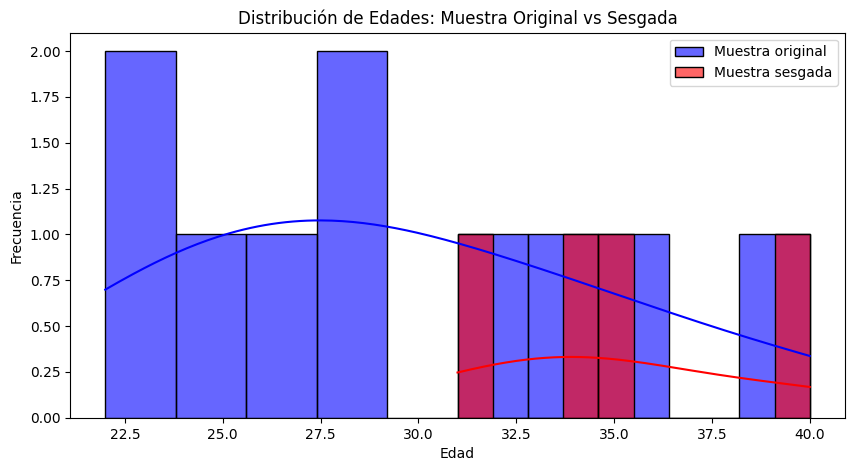

In [4]:
# @title **Simulación de cobertura insuficiente: Supongamos que la encuesta excluye a personas menores de 30 años. Esto introduce un sesgo, que podemos observar con un gráfico.**
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una muestra sesgada (personas mayores de 30)
muestra_sesgada = encuesta[encuesta['Edad'] > 30]

# Visualizar distribución de edades en la muestra y la muestra sesgada
plt.figure(figsize=(10, 5))
sns.histplot(encuesta['Edad'], bins=10, kde=True, color='blue', label='Muestra original', alpha=0.6)
sns.histplot(muestra_sesgada['Edad'], bins=10, kde=True, color='red', label='Muestra sesgada', alpha=0.6)
plt.legend()
plt.title("Distribución de Edades: Muestra Original vs Sesgada")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


## **Interpretación**
+ **Sesgo de género** :

+ La diferencia entre la proporción en la muestra y la población nos indica el sesgo.
+ Las ponderaciones ajustan la muestra para reflejar mejor la distribución poblacional.
+ **Cobertura insuficiente** :

+ El histograma muestra cómo las exclusiones afectan la representatividad.

In [5]:
# @title **1. Simulación de una encuesta con cobertura insuficiente**
import pandas as pd
import numpy as np

# Simulación de población y encuesta
np.random.seed(42)
poblacion = pd.DataFrame({
    'ID': np.arange(1, 10001),
    'Edad': np.random.choice(range(18, 65), size=10000, replace=True),
    'Genero': np.random.choice(['Hombre', 'Mujer'], size=10000, p=[0.5, 0.5])
})

# Encuesta con cobertura insuficiente (solo mayores de 40 años)
encuesta = poblacion[poblacion['Edad'] > 40].sample(500)

# Análisis de distribución
print("Distribución de género en la población:")
print(poblacion['Genero'].value_counts(normalize=True))
print("\nDistribución de género en la encuesta:")
print(encuesta['Genero'].value_counts(normalize=True))


Distribución de género en la población:
Genero
Mujer     0.5013
Hombre    0.4987
Name: proportion, dtype: float64

Distribución de género en la encuesta:
Genero
Hombre    0.518
Mujer     0.482
Name: proportion, dtype: float64


**Resultado esperado**
+ La población tiene una distribución de género equilibrada, pero la encuesta puede tener una representación sesgada debido a la exclusión de personas jóvenes.

In [6]:
# @title **2. Identificación de sesgo de no respuesta**
# Simulación de respuestas
poblacion['Respondio'] = np.random.choice([1, 0], size=10000, p=[0.7, 0.3])  # 70% responde
respondieron = poblacion[poblacion['Respondio'] == 1]

# Comparación de distribución entre respondieron y población
print("Distribución de edades en la población:")
print(poblacion['Edad'].describe())
print("\nDistribución de edades en los que respondieron:")
print(respondieron['Edad'].describe())


Distribución de edades en la población:
count    10000.000000
mean        41.054000
std         13.484104
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         64.000000
Name: Edad, dtype: float64

Distribución de edades en los que respondieron:
count    7026.000000
mean       41.035155
std        13.501751
min        18.000000
25%        29.000000
50%        41.000000
75%        53.000000
max        64.000000
Name: Edad, dtype: float64


**Análisis**
+ Si la media de edad de los que respondieron es significativamente mayor o menor que la población, puede haber un sesgo de no respuesta.

In [7]:
# @title **3. Corrección del sesgo mediante ponderaciones**
# Ponderación para corregir subrepresentación
poblacion['Genero'].value_counts(normalize=True)
encuesta['Peso'] = encuesta['Genero'].map({
    'Hombre': poblacion['Genero'].value_counts(normalize=True)['Hombre'] / encuesta['Genero'].value_counts(normalize=True)['Hombre'],
    'Mujer': poblacion['Genero'].value_counts(normalize=True)['Mujer'] / encuesta['Genero'].value_counts(normalize=True)['Mujer']
})

# Media ponderada
media_ponderada = np.average(encuesta['Edad'], weights=encuesta['Peso'])
print(f"Media de edad corregida: {media_ponderada:.2f}")


Media de edad corregida: 52.44


**Explicación**
+ Se aplica un peso a cada observación para ajustar la muestra a la población real. Esto es útil para mitigar la subrepresentación.

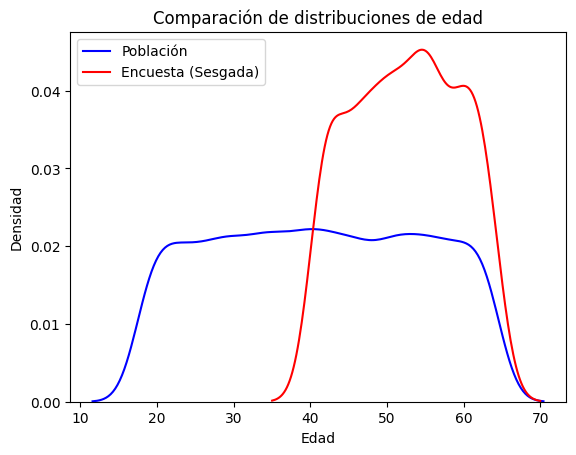

In [8]:
# @title **4. Visualización para analizar sesgos**
import matplotlib.pyplot as plt
import seaborn as sns

# Comparación de distribución de edades
sns.kdeplot(poblacion['Edad'], label='Población', color='blue')
sns.kdeplot(encuesta['Edad'], label='Encuesta (Sesgada)', color='red')
plt.title("Comparación de distribuciones de edad")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()


**Gráficos esperados**
+ El gráfico mostrará cómo la distribución de edades de la encuesta difiere de la población.